In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import nltk # NLP library that we will be using
import string

In [6]:
nltk.download_shell() #interacative shell that we can use 
# this shows us all the packages that are available
# we are looking for stop words so we can create a spam filter
# hit l to look at list
# hit d to download
# enter stop words
# once finished downloading we can hit 'q' to quit the shell

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           

In [7]:
# grabbing a data set from UCI public data sets 
# UCI ML Repository 
# use list comprehension to load 
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
# so this opens the 'smsspancollection' folder and reads the SMSSpamCollection file

In [8]:
print(len(messages)) # we have 5574 rows of data

5574


In [9]:
messages[0] # that the first sms message

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
# print out the first 10 messages and number
for mess_no,message in enumerate(messages[:10]): # first 10
    print(mess_no,message) # print the message 
    print('\n') # print a new line in between each message 

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [11]:
# due to the spacing we can tell that this is a tab seperated file.
# there is a blank space inbetween the spam/ham and the message 
# remember we added the enumeraton in the loop above
messages[0]
# notice ham\tGo

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
# so we can use pandas to clean this up 
# use read_csv but with tab seperation to create the df
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t'
                      , names = ['label', 'message']) # manually assigning the column names

In [13]:
messages.head() # check to see if it worked

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# okay now so like any other data set we are going to do some EDA
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
# use groupby to describe by label
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
# NLP is all about feature engineering
# it is important to understand the data that you are working with 
# add a new column to see how long the messages are
messages['length'] = messages['message'].apply(len)

In [17]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


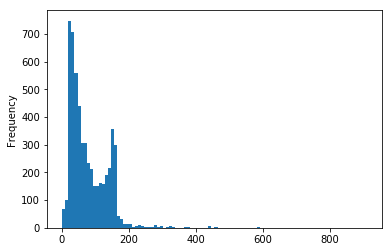

In [18]:
# do some basic viz
messages['length'].plot.hist(bins = 100)
# bimodal behavior

In [19]:
messages['length'].describe() 

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
messages[messages['length'] == 910]['message'].iloc[0] # what is this super loing message
# glancing at it, something about love and chicken curry

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [21]:
# there is probably correlation between length and ham/spam

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115aa70f0>,
      dtype=object)

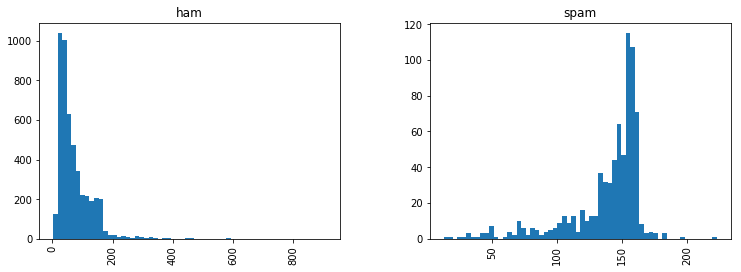

In [22]:
messages.hist(column = 'length', by = 'label', bins = 60, figsize = (12,4))
# yea so as expected there is a sigdif

In [23]:
# now we need to do some preprocessing 
# we are going to begin by removing punctuation
# we will demostrate by creating a sample message
mess = 'Sample message! Notice: it has punctuation.'

In [24]:
string.punctuation
# we can use list comprehension to check

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
no_punc = [c for c in mess if c not in string.punctuation]
no_punc
# notice that all the punctuation has been removed and are blank

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [26]:
# so we are now going to use that list of stop words from nltk that we were working with earlier
from nltk.corpus import stopwords

In [27]:
stopwords.words('english') # we are using an English language data base
# this is a list of common words that do not give us any distinguishin features
# these words are so common that they will not help

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
# using the example
# joining elements in a list together
no_punc = ''.join(no_punc)
# this method joins using the preceeding concatination device
# since the '' are blank, it removes any blank space

In [29]:
no_punc

'Sample message Notice it has punctuation'

In [30]:
# now we are going to split the string into a list of words
no_punc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [31]:
# now we use list comprehension to remove any stop words
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [32]:
clean_mess
# so have removed the stopwords 'it' and 'has'

['Sample', 'message', 'Notice', 'punctuation']

In [33]:
# okay so we are now going to use this to build a function that we can apply to the df
# ideally you want to do this in an IDE like PyCharm
def text_process(mess):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    
    no_punc = [char for char in mess if char not in string.punctuation]
    
    no_punc = ''.join(no_punc)
    
    return[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [34]:
# check out the messages 
# we are now going to tokenize
# we are converting a text string into a list of tokens
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [36]:
# now we will begin apply
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
# we will specify the analyzer to be our own define function text_process
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])
# fitting it to our data
# this will create a very large sparce matrix may take a while depending on your local machine 
# bow = bag of words

In [38]:
print(len(bow_transformer.vocabulary_))
# so we have 11425 key words in our data set 
# this is after we have removed the stop words

11425


In [39]:
# to better understand we will create an object 
mess4 = messages['message'][3] # grabbing the 4th messages in df

In [40]:
print(mess4)

U dun say so early hor... U c already then say...


In [41]:
bow4 = bow_transformer.transform([mess4])

In [42]:
print(bow4)
# so there a re 5 unique words in the message
# there are 2 words that appear twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [43]:
print(bow4.shape)

(1, 11425)


In [44]:
bow_transformer.get_feature_names()[4068]# can add the indcies we just pulled to check 

'U'

In [45]:
bow_transformer.get_feature_names()[4629]# can add the indcies we just pulled to check 

'already'

In [46]:
bow_transformer.get_feature_names()[5261]# can add the indcies we just pulled to check 

'c'

In [47]:
bow_transformer.get_feature_names()[6204]# can add the indcies we just pulled to check 

'dun'

In [48]:
bow_transformer.get_feature_names()[6222]# can add the indcies we just pulled to check 

'early'

In [49]:
bow_transformer.get_feature_names()[7186]# can add the indcies we just pulled to check 

'hor'

In [50]:
bow_transformer.get_feature_names()[9554]# can add the indcies we just pulled to check 

'say'

In [51]:
# move on
messages_bow = bow_transformer.transform(messages['message'])
# may take some time depending on your machine

In [52]:
print('Shape of the Sparce Matrix:', messages_bow.shape)

Shape of the Sparce Matrix: (5572, 11425)


In [53]:
#checking the amount of non zero occurances
messages_bow.nnz

50548

In [54]:
# we can calucte the sparisty
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))
# this compares the NON Zeros to the mumber of messages in the matrix

sparsity: 0.07940295412668218


In [55]:
# now td-idf
from sklearn.feature_extraction.text import TfidfTransformer

In [56]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [57]:
# we will use the bow4 from earlier so we can see what happens on a smaller scale
tfidf4 = tfidf_transformer.transform(bow4)

In [58]:
print(tfidf4)
# term-frequency and inverse-docuement-frequecy relationship
# this is a weighted value number for each word 

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [59]:
# we can now check the docuement frequency of a word
# check the idf of the word 'university'
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [60]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
# so we now finally have the messages represetned as numerical vectors

In [61]:
# as with most spam filters, the naive bayes is a good approach
from sklearn.naive_bayes import MultinomialNB

In [62]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [63]:
# test the prediction
spam_detect_model.predict(tfidf4)[0]

'ham'

In [64]:
messages['label'][3]

'ham'

In [65]:
# now we will a prediction model against all messages
all_pred = spam_detect_model.predict(messages_tfidf)

In [66]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [67]:
"""
It is important to remember that we ran this model on all of our data. We did not split the data into a training
and validation set. So we will now split the data into a training and validation set. We well then run the model again.
This will give us an idea of the true power of our predictive model. 
"""

'\nIt is important to remember that we ran this model on all of our data. We did not split the data into a training\nand validation set. So we will now split the data into a training and validation set. We well then run the model again.\nThis will give us an idea of the true power of our predictive model. \n'

In [68]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
# splitting the data
msg_train, msg_test, label_train, label_split = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [72]:
# instead of reapting this entire process, we can use the SKLEARN pipeline feaure
from sklearn.pipeline import Pipeline

In [73]:
# We're going to make a object called pipeline and that's going to be an instance of pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)) # create a tuple with the name of the step , what you want to do
    , ('tfidf', TfidfTransformer()) # calculate two way tfidf scores
    , ('classifier', MultinomialNB())
                    ])

In [74]:
# this pipeline model can now be treated as a normal estimator 
pipeline.fit(msg_train, label_train) # X_train, y_train

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x117ad5378>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [75]:
predictions = pipeline.predict(msg_test)

In [76]:
# run a classifcation report
from sklearn.metrics import classification_report

In [78]:
print(classification_report(label_split, predictions)) # notice up top I misslabels the y_true 

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1452
       spam       1.00      0.74      0.85       220

avg / total       0.97      0.97      0.96      1672



In [ ]:
"""
Now we can see if we get around the 96 percent accuracy or precision and recall which is pretty good.

"""